In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_california_housing


# fetch a regression dataset
data = fetch_california_housing() 
X = data["data"]
col_names = data["feature_names"] 
y = data["target"]

In [2]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
# initialize the model
model = LinearRegression()
# initialize RFE
rfe = RFE(estimator=model, n_features_to_select=3
)

In [8]:
# fit RFE
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [9]:
# get the transformed data with
# selected columns
X_transformed = rfe.transform(X)

In [10]:
X_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

In [16]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt


# fetch a regression dataset
# in diabetes data we predict diabetes progression # after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

RandomForestRegressor()

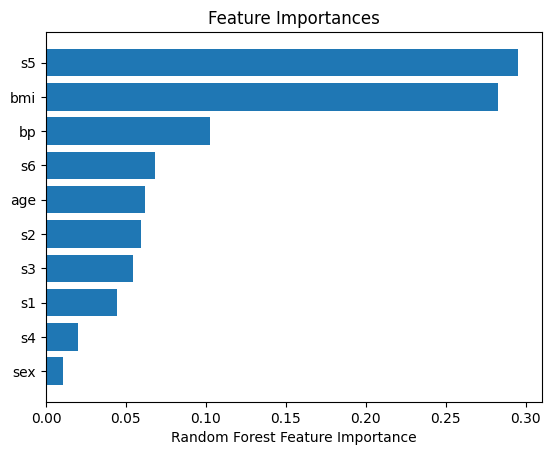

In [17]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center') 
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs]) 
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [18]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fetch a regression dataset
# in diabetes data we predict diabetes progression # after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = RandomForestRegressor()
# select from the model
sfm = SelectFromModel(estimator=model) 
X_transformed = sfm.fit_transform(X, y)

# see which features were selected
support = sfm.get_support()

# get feature names
print([
x for x, y in zip(col_names, support) if y == True
]) 

['bmi', 's5']


In [19]:
col_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [20]:
X_transformed

array([[ 0.06169621,  0.01990842],
       [-0.05147406, -0.06832974],
       [ 0.04445121,  0.00286377],
       [-0.01159501,  0.02269202],
       [-0.03638469, -0.03199144],
       [-0.04069594, -0.04118039],
       [-0.04716281, -0.06291295],
       [-0.00189471, -0.03581673],
       [ 0.06169621, -0.01495648],
       [ 0.03906215,  0.06773633],
       [-0.08380842, -0.06291295],
       [ 0.01750591, -0.09643322],
       [-0.02884001, -0.03075121],
       [-0.00189471,  0.03839325],
       [-0.02560657, -0.03199144],
       [-0.01806189,  0.03605579],
       [ 0.04229559,  0.05228   ],
       [ 0.01211685,  0.02736771],
       [-0.0105172 , -0.01811827],
       [-0.01806189, -0.00894402],
       [-0.05686312, -0.01190068],
       [-0.02237314, -0.07212845],
       [-0.00405033, -0.0611766 ],
       [ 0.06061839,  0.13359898],
       [ 0.03582872, -0.02595242],
       [-0.01267283,  0.01919903],
       [-0.07734155, -0.0425721 ],
       [ 0.05954058, -0.01599827],
       [-0.02129532,

In [21]:
support

array([False, False,  True, False, False, False, False, False,  True,
       False])